In [1]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
np.random.seed(0)
(m, n) = (300, 100)
A = np.random.rand(m, n)
b = A.dot(np.ones((n, 1)))/2
c = -np.random.rand(n, 1)

In [2]:
#Solve relaxed LP
x = cvx.Variable(n)
objective = cvx.Minimize(c.T*x)
constraints = [0<=x, x<=1,A*x<=b.reshape(300,)]
cvx.Problem(objective, constraints).solve()
L = objective.value
x_rlx = x.value
L,x_rlx.shape

c:\Users\Latitude 5289 2-in-1\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
c:\Users\Latitude 5289 2-in-1\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code

(-34.41722425996278, (100,))

In [3]:
#Rounding parameters
N = 100
t = np.linspace(0, 1, num=N).reshape(N, 1)
maxviol = np.zeros((N, 1))
obj = np.zeros((N, 1))
U = float('inf')
t_best = float('nan')

In [4]:
#Round
for i in range(N):
    x = np.array(x_rlx >= t[i], dtype = float)
    obj[i] = c.T@x
    maxviol[i] = max(A@x.reshape(100,1)-b)
    if maxviol[i]<=0 and obj[i]<U:
        U = float(obj[i])
        x_best = x
        t_best = t[i]

In [8]:
print('the upper bound is :',U,'\n','the lower bound is :',L,'\n', "the best x is :\n",x_best,'\n',"the t best is :",t_best)

the upper bound is : -33.57725134530702 
 the lower bound is : -34.41722425996278 
 the best x is :
 [1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0.] 
 the t best is : [0.55555556]


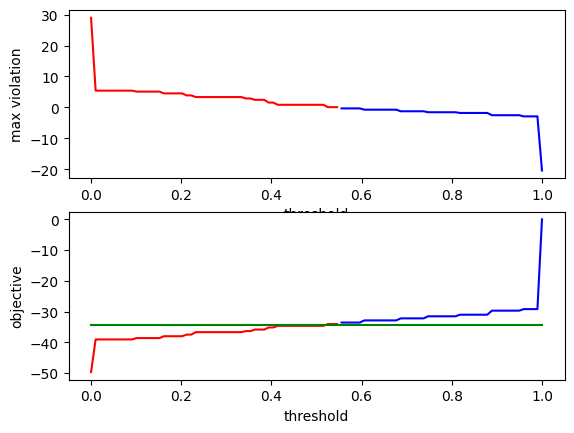

In [9]:
#Plot
plt.figure(1)
plt.subplot(211)
plt.plot(t[maxviol<=0], maxviol[maxviol<=0], 'b')
plt.plot(t[maxviol>0], maxviol[maxviol>0], 'r')
plt.ylabel('max violation')
plt.xlabel('threshold')
plt.subplot(212)
plt.plot(t[maxviol<=0], obj[maxviol<=0], 'b')
plt.plot(t[maxviol>0], obj[maxviol>0], 'r')
plt.plot(t,objective.value*np.ones((N,1)), 'g')
plt.ylabel('objective')
plt.xlabel('threshold')
plt.savefig('boolean_lp_heur_py.eps')
plt.show()